In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\program\anaconda\envs\venv\python.exe -m pip install --upgrade pip' command.


In [35]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [36]:
import graphviz

In [21]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
ebay = pd.read_csv('./ebayAuctions.csv')

In [5]:
ebay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [6]:
ebay['Competitive?'].value_counts()

1    1066
0     906
Name: Competitive?, dtype: int64

In [7]:
ebay.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [8]:
ebay_new = ebay.drop(ebay[(ebay['Competitive?'] == 1) & (ebay['ClosePrice'] == ebay['OpenPrice'])].index)

In [9]:
ebay_new.shape

(1934, 8)

In [10]:
dummies_categories = pd.get_dummies(ebay_new['Category']).rename(columns = lambda x: 'Category_' + str(x))

In [11]:
dummies_currency = pd.get_dummies(ebay_new['currency']).rename(columns = lambda x: 'Currency_' + str(x))

In [12]:
dummies_endday = pd.get_dummies(ebay_new['endDay']).rename(columns = lambda x: 'EndDay_' + str(x))

In [13]:
dummies_duration = pd.get_dummies(ebay_new['Duration']).rename(columns = lambda x: 'Duration_' + str(x))
ebay_new = pd.concat([ebay_new, dummies_categories, dummies_currency,dummies_endday, dummies_duration], axis = 1)

In [14]:
ebay_new = ebay_new.drop(['Category','currency','endDay','Duration'], axis = 1)

In [15]:
ebay_new.head()

,sellerRating,ClosePrice,OpenPrice,Competitive?,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,...,EndDay_Sat,EndDay_Sun,EndDay_Thu,EndDay_Tue,EndDay_Wed,Duration_1,Duration_3,Duration_5,Duration_7,Duration_10
0,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
ebayX = ebay_new.loc[:, ebay_new.columns != 'Competitive?']

In [17]:
ebayX

,sellerRating,ClosePrice,OpenPrice,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,...,EndDay_Sat,EndDay_Sun,EndDay_Thu,EndDay_Tue,EndDay_Wed,Duration_1,Duration_3,Duration_5,Duration_7,Duration_10
0,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3249,0.01,0.01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,2992,359.95,359.95,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1968,21,610.00,300.00,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1969,1400,549.00,549.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1970,57,820.00,650.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
ebayY = ebay_new['Competitive?']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(ebayX, ebayY, test_size=0.4, random_state=0)

In [27]:
Y_test

984     0
1156    1
507     1
1537    0
1722    0
       ..
1589    0
203     0
940     0
1468    1
680     0
Name: Competitive?, Length: 774, dtype: int64

In [28]:
Y_test.value_counts()

1    404
0    370
Name: Competitive?, dtype: int64

In [28]:
tree = DecisionTreeClassifier(min_samples_split=50)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_split=50)

In [29]:
Y_predicted = tree.predict(X_test)
Y_predicted

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,

In [30]:
tree.score(X_test, Y_test)

0.8488372093023255

In [31]:
confusion_matrix = confusion_matrix(Y_test, Y_predicted)

In [32]:
confusion_matrix

array([[323,  47],
       [ 70, 334]], dtype=int64)

In [38]:
dot_data = export_graphviz(tree, out_file = None, feature_names=X_train.columns)
graph = graphviz.Source(dot_data)
graph.render()

'Source.gv.pdf'

In [39]:
export_graphviz(tree, out_file = "mytree.dot", feature_names=X_train.columns)

In [55]:
!pip install scikit-plot

You should consider upgrading via the 'd:\program\anaconda\envs\venv\python.exe -m pip install --upgrade pip' command.


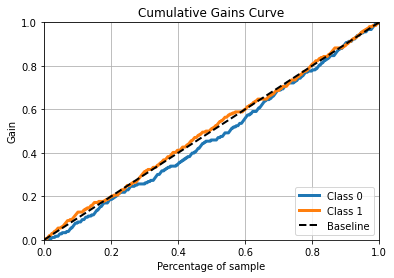

In [116]:
import matplotlib.pyplot as plt
import scikitplot as skplt
import numpy as np

skplt.metrics.plot_cumulative_gain(np.array(Y_test), np.reshape(Y_predicted, (-1,2)))
plt.savefig('./lift_chart.png')
plt.show()

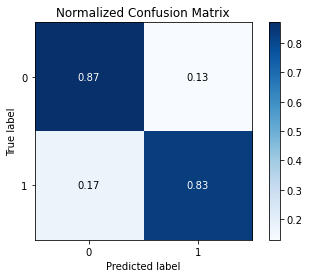

In [117]:
skplt.metrics.plot_confusion_matrix(Y_test, Y_predicted,
                                    normalize=True)
plt.savefig('./confusion_matrix.png')
plt.show()

In [94]:
np.array(Y_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,

In [118]:
np.reshape(Y_predicted, (-1,2))

array([[0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0,